# Save the crops notebook

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

## Get and clean the data
⚠️ Parts of the code is written to use in Google Colab. The data was originaly stored online in Google Drive.

### Let's first have a look at some pictures

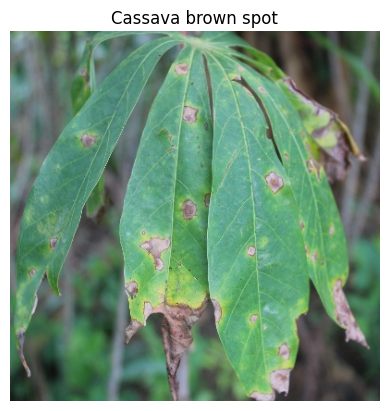

In [10]:
# ! unzip -n ~/code/MahautHDL/save_the_crops/raw_data/crop.zip -d ~/code/MahautHDL/save_the_crops/raw_data

data_link = os.environ.get("RAW_DATA_PATH")
crops = os.listdir(data_link)
plant_disease = np.random.randint(0, len(crops))
plant_disease_name = crops[plant_disease]

os.chdir(f'{data_link}/{plant_disease_name}')

link = os.listdir(f"{data_link}/{plant_disease_name}")
rand_pic_nr = np.random.randint(0, len(link))

img = plt.imread(link[rand_pic_nr])

plt.imshow(img)
plt.axis(False)
plt.title(plant_disease_name)
plt.show()

## Remove corrupted pictures
Parts of the datafile was corrupted, so we need to loop over the pictures to keep only the good ones.

In [11]:
from crops_package.data import check_for_errors_and_create_excel

# Depending on the platform, we use the kaggle or local link:
kaggle_link = "/kaggle/input/crop-pest-and-disease-detection"
local_link = os.environ.get("RAW_DATA_PATH")

check_for_errors_and_create_excel(local_link)

Tomato leaf blight finished.
Tomato leaf curl finished.
Tomato verticulium wilt finished.
Tomato healthy finished.
Tomato septoria leaf spot finished.
Tomato csv has been saved.
Cassava brown spot finished.
Cassava mosaic finished.
Cassava green mite finished.
Cassava healthy finished.
Cassava bacterial blight finished.
Cassava csv has been saved.
Cashew leaf miner finished.
Cashew gumosis finished.
Cashew red rust finished.
Cashew healthy finished.
Cashew anthracnose finished.
Cashew csv has been saved.
Maize leaf blight finished.
Maize fall armyworm finished.
Maize grasshoper finished.
Maize streak virus finished.
Maize leaf beetle finished.
Maize leaf spot finished.
Maize healthy finished.
Maize csv has been saved.
All csv's have been saved


## Create the model per crop
Modify the crop you want to check below:

In [12]:
crop = "cashew"

In [21]:
from crops_package.data import preprocessor_df, split_data

# Load and preprocess the csv
## Kaggle
# data = pd.read_csv(f'/kaggle/input/csv-crops/{crop}.csv')
# data['filename'] = '/kaggle/input/crop-pest-and-disease-detection/' + data['filename']

## Local
data = pd.read_csv(f"../../data/{crop}.csv")
data['filename'] = f"{os.environ.get('RAW_DATA_PATH')}" + "/" + data['filename']
data['class'] = data['class'].astype(str)
data['class']

print("Dataframe loaded, starting with preprocessing")

train_df, val_df, test_df = split_data(data)
train_generator = preprocessor_df(train_df)
val_generator = preprocessor_df(val_df)

Dataframe loaded, starting with preprocessing
Found 4731 validated image filenames belonging to 5 classes.
Found 835 validated image filenames belonging to 5 classes.


In [23]:
from crops_package.model import initialize_model, fit_and_save_model

# Initialize, Fit and save model

classes_in_crop = data['class'].unique().size
model = initialize_model(classes_in_crop)

globals()[f"history_{crop}"] = fit_and_save_model(model, train_generator, val_generator, crop, epochs = 1)


Saving TensorBoard log files to: ../../callbacks//cashew_model-20240328-132315


: 

In [ ]:
# Load model if necessary
crop = crop  # change if you want to load another crop
model_cashew = tf.keras.models.load_model('../../models/{crop}-model.keras', safe_mode=False)

,filename,class
0,Cashew leaf miner/leaf miner988_.jpg,Cashew leaf miner
1,Cashew leaf miner/leaf miner1051_.jpg,Cashew leaf miner
2,Cashew leaf miner/leaf miner202_.jpg,Cashew leaf miner
3,Cashew leaf miner/leaf miner469_.jpg,Cashew leaf miner
4,Cashew leaf miner/leaf miner828_.jpg,Cashew leaf miner
...,...,...
6544,Cashew anthracnose/anthracnose1312_.jpg,Cashew anthracnose
6545,Cashew anthracnose/anthracnose451_.jpg,Cashew anthracnose
6546,Cashew anthracnose/anthracnose649_.jpg,Cashew anthracnose
6547,Cashew anthracnose/anthracnose1006_.jpg,Cashew anthracnose
